In [53]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [54]:
import pandas as pd

pf_AUM = pd.read_csv(path_data+'pf_AUM.csv', parse_dates=['date'], index_col='date')
pf_AUM = pd.Series(pf_AUM.iloc[:, -1])

pf_returns = pd.read_csv(path_data+'pf_returns.csv', parse_dates=['date'], index_col='date')
pf_returns = pd.Series(pf_returns.iloc[:, -1])

In [55]:
# exercise 01

"""
Annualizing portfolio returns

Suppose you invested $101 at the beginning of 2015 in a portfolio. By the end of March 2018, you wonder how your portfolio has performed over time, and whether it is as good as another portfolio which started trading mid-2016. What performance metric do you look at? Well, the annualized return of course!

So let's calculate the annualized rate of return for your portfolio. Since our sample covers 3.2 years, let's use the monthly denomination in the formula for annualized returns. The number of months is already given under months.

Available are the data on portfolio returns under pf_returns, as well as as a separate series pf_AUM containing the portfolio's value, or assets under management (AUM). Good luck!
"""

# Instructions

"""

    Calculate the total rate of return from the first and last observation stored in the portfolios value series pf_AUM. Use indexing again to take the last and first observation from the series.
---

    Annualize the total rate of return by inputting the counted months in the formula, as well as the total return rate.

"""

# solution
months = 38
# Calculate total rate of return from start to end
total_return = (pf_AUM.iloc[-1] - pf_AUM.iloc[0]) / pf_AUM.iloc[0]

# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
print(annualized_return*100,'%')

#----------------------------------#

# Conclusion

"""
Great work! Well that's a pretty great return right? Now that you've learned the steps to annualize returns, you can use this type of return to compare portfolios who have different time spans. In the next exercise, let's see how you can use annualized return to objectively compare investment opportunities.
"""

19.623938683051414 %


"\nGreat work! Well that's a pretty great return right? Now that you've learned the steps to annualize returns, you can use this type of return to compare portfolios who have different time spans. In the next exercise, let's see how you can use annualized return to objectively compare investment opportunities.\n"

In [56]:
sp500_value = pd.read_csv(path_data+'sp500.csv', parse_dates=['date'], index_col='date')

sp500_value = pd.Series(sp500_value.iloc[:,-1])
sp500_value.head()


date
2015-01-02    2058.199951
2015-01-05    2020.579956
2015-01-06    2002.609985
2015-01-07    2025.900024
2015-01-08    2062.139893
Name: S&P500, dtype: float64

In [57]:
# exercise 02

"""
Comparing annualized rates of return

In the last exercise, you saw that the annualized rate of return was 19.6%. That's pretty high! But since your portfolio consists of only 4 stocks, this high return is indeed possible as it is not very diversified. Let's compare the portfolio's annual rate of return, with that of the S&P500, which is much more diversified.

The value of the S&P500 between 1st of January 2015 and end of December 2018 has been made available. That's 4 years of data. You have full years this time, so use the year denomination in the formula for the annualized return. The data is stored under sp500_value.
"""

# Instructions

"""

    Calculate the total return over the four years from the first and the last observation in sp500_value.
    
    Calculate the annualized return from the total_return over four years.

"""

# solution

# Calculate the total return from the S&P500 value series
total_return = (sp500_value.iloc[-1] - sp500_value.iloc[0]) / sp500_value.iloc[0]
print(total_return)

# Annualize the total return spanning 4 years
annualized_return = ((1 + total_return)**(1/4))-1
print (annualized_return)

#----------------------------------#

# Conclusion

"""
Wonderful work! You see that once you get the hang of it, annualizing returns is relatively straightforward. But it is oh so important when you are comparing portfolio performance numbers, as you're using the same yardstick to measure them against. In the next lesson, you'll learn more about returns and how you should take into account the level of risk taken to achieve those returns. In fact, you'll see that the portfolio returns, although much higher, might not be that great compared to the S&P500 after all, when you take risk into account!
"""

0.3762365831481841
0.08311176814071208


"\nWonderful work! You see that once you get the hang of it, annualizing returns is relatively straightforward. But it is oh so important when you are comparing portfolio performance numbers, as you're using the same yardstick to measure them against. In the next lesson, you'll learn more about returns and how you should take into account the level of risk taken to achieve those returns. In fact, you'll see that the portfolio returns, although much higher, might not be that great compared to the S&P500 after all, when you take risk into account!\n"

# Interpreting the Sharpe ratio

In the video, you saw that the Sharpe ratio of the Apple stock was below 1, namely 0.64. Remember, the Sharpe ratio represents the return proportional to risk, so how do you interpret a Sharpe ratio of 0.64? Which of the below statements is correct?

### Possible Answers


    A Sharpe ratio of 1 and up indicates that the returns on investment are proportional to the risk taken. A Sharpe ratio lower than 1 indicates that return on investment is less than the risk taken. {Answer}
    
    
    A positive Sharpe ratio indicates that the return on investment is proportional to the risk taken, irregardless of size of the ratio. Only when the Sharpe ratio becomes negative, you have bad investment results.
    
    
    The Sharpe ratio will always be positive, i.e. a negative Sharpe ratio can never happen, and the size of the Sharpe ratio does not matter.

**When the Sharpe ratio is below 1, the return does not outweigh the risk proportionally. Although there might be other reasons to invest in such a portfolio, the Sharpe ratio doesn't indicate you are getting a great risk-return trade-off.**

In [58]:
# exercise 03

"""
S&P500 Sharpe ratio

In this exercise, you're going to calculate the Sharpe ratio of the S&P500, starting with pricing data only. In the next exercise, you'll do the same for the portfolio data, such that you can compare the Sharpe ratios of the two.

Available for you is the price data from the S&P500 under sp500_value. The risk-free rate is available under rfr, which is conveniently set to zero. Let's give it a try!
"""

# Instructions

"""

    
    Calculate the total return of the S&P500 pricing data sp500_value using indexing and annualize the total return number; the data spans 4 years.
    
    Calculate the daily returns from the S&P500 pricing data, you'll need this for the volatility calculation.
    
    Calculate the standard deviation from the returns data and annualize the number using 250 trading days.
    
    Finally, calculate the Sharpe ratio using the annualized return and the annualized volatility and print the results.

"""
rfr = 0
import numpy as np
# solution

# Calculate total return and annualized return from price data 
total_return = (sp500_value.iloc[-1] - sp500_value.iloc[0]) / sp500_value.iloc[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(1/4))-1

# Create the returns data 
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
print (sharpe_ratio)

#----------------------------------#

# Conclusion

"""
Good job! Notice that it takes quite a few steps to calculate the Sharpe ratio from your annualized returns and volatility. Let's now repeat these steps on the portfolio data, and see how the portfolio measures up.
"""

0.6105038859521851


"\nGood job! Notice that it takes quite a few steps to calculate the Sharpe ratio from your annualized returns and volatility. Let's now repeat these steps on the portfolio data, and see how the portfolio measures up.\n"

In [59]:
# exercise 04

"""
Portfolio Sharpe ratio

In this exercise you are now going to calculate the Sharpe ratio of the portfolio. How do you think the portfolio Sharpe ratio will be different to the S&P500 Sharpe ratio? You'll find out in this exercise.

You have the portfolio value over time under pf_AUM and the number of months for that data under months. Last, the risk-free rate is available under rfr, which is still set to zero.
"""

# Instructions

"""

    
    Calculate the total return from pf_AUM and annualized return for the period defined under months
    
    Calculate the annualized volatility, vol_pf, using the standard deviation of the returns. Use 250 trading days
    
    Calculate the Sharpe ratio. Don't forget to subtract the risk-free rate rfr from the annualized return.

"""

# solution
months = 48
# Calculate total return and annualized return from price data 
total_return = (pf_AUM.iloc[-1] - pf_AUM.iloc[0]) / pf_AUM.iloc[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(12/months))-1

# Create the returns data 
pf_returns = pf_AUM.pct_change()

# Calculate annualized volatility from the standard deviation
vol_pf = pf_returns.std()*np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) /vol_pf)
print (sharpe_ratio)

#----------------------------------#

# Conclusion

"""
Great work! It is surprising, right? The small portfolio has a better Sharpe ratio than the S&P500. This has to do with the portfolio weights, as those are set to invest most in the best stocks, which, looking back is very easy. Setting the right weights for the future is much harder, and this will be covered in Chapter 4. In the next lesson, you'll learn more about risk and how to go beyond volatility and expected returns to get the full picture.
"""

0.7846293748029132


"\nGreat work! It is surprising, right? The small portfolio has a better Sharpe ratio than the S&P500. This has to do with the portfolio weights, as those are set to invest most in the best stocks, which, looking back is very easy. Setting the right weights for the future is much harder, and this will be covered in Chapter 4. In the next lesson, you'll learn more about risk and how to go beyond volatility and expected returns to get the full picture.\n"

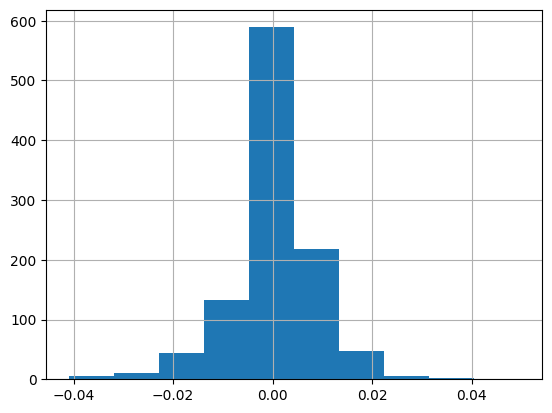

"\nCorrect: A negative skew means there is a 'bump to the right' compared to the normal distribution, which is what the sample data looks like.\n"

In [70]:
# exercise 05

"""
Skewness of the S&P500

We already know from the video that the S&P500 should be normally distributed, without too much skewness (when you have enough data). However, since you're working with a short data sample spanning only a few years, there might actually be some skewness in your sample. To make you aware of this potential sample skewness, let's plot the data and have a look.

The returns data from the S&P500 is available as returns_sp500.
"""

# Instructions

"""

    Create a histogram of your returns data with the hist() function, followed by plt.show() to see the plot.
---
Question

Looking at the histogram of the S&P500 returns, what can you say about the skewness in this data?
Possible answers:
    
    The S&P500 data has a positive skew; the mean is to the right of the mode and the median, this data has less positive returns compared to a normal distribution with a mean of zero.
    
    The S&P500 data has a negative skew; the mean is to the left of the mode and median, this data has more positive returns compared to a normal distribution with a mean of zero. {Answer}
    
    The S&P500 data is not skewed and is in line with the long term normal distribution with a mean of zero.
"""

# solution
import matplotlib.pyplot as plt
# Create a histogram of the S&P500 returns and show the plot
returns_sp500.hist()
plt.show()

#----------------------------------#

# Conclusion

"""
Correct: A negative skew means there is a 'bump to the right' compared to the normal distribution, which is what the sample data looks like.
"""

In [71]:
# exercise 06

"""
Calculating skewness and kurtosis

You just saw the histogram of the S&P500 data, let's now put it into numbers and calculate skewness and kurtosis. For the full picture of the distribution, you'll also look at the mean and standard deviation. Available are the S&P500 returns data under returns_sp500, which is all you need for this.
"""

# Instructions

"""

    Calculate the mean and the standard deviation.
    Calculate the skewness.
    Calculate kurtosis.

"""

# solution

# Print the mean
print("mean : ", returns_sp500.mean()*100)

# Print the standard deviation
print("Std. dev  : ", returns_sp500.std()*100)

# Print the skewness
print("skew : ", returns_sp500.skew())

# Print the kurtosis
print("kurt : ", returns_sp500.kurtosis())

#----------------------------------#

# Conclusion

"""
Fantastic! You see that calculating skewness and kurtosis is very easy, and gives you immediate insights into what you can expect as an investor in terms of returns. Let's compare skewness and kurtosis for a couple of investment options in the next exercise.
"""

mean :  0.03389998442910263
Std. dev  :  0.8610018502291801
skew :  -0.3831994518762794
kurt :  3.9223911008585053


"\nFantastic! You see that calculating skewness and kurtosis is very easy, and gives you immediate insights into what you can expect as an investor in terms of returns. Let's compare skewness and kurtosis for a couple of investment options in the next exercise.\n"

In [74]:
stock_returns = pd.read_csv(path_data+'small_portfolio.csv', parse_dates=['date'], index_col='date')

stock_returns.head()

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10


skew :  GE     -1.315660
JPM     0.743794
MSFT    0.755347
PG     -0.496022
dtype: float64
kurt :  GE      1.071946
JPM    -0.641370
MSFT   -0.315214
PG     -0.226965
dtype: float64


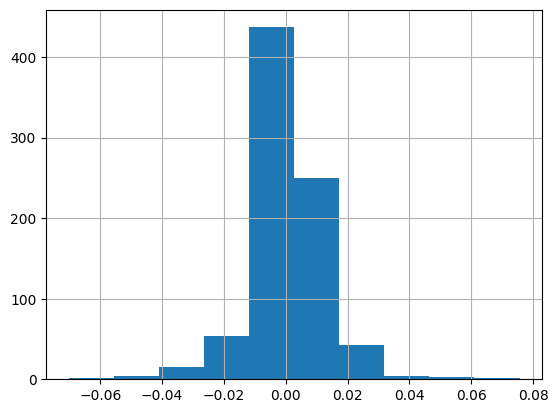

skew :  0.24634690384169625
kurt :  6.651785261134711


'\nCorrect! A value above 3 indicates a fat tailed distribution.\n'

In [76]:
# exercise 07

"""
Comparing distributions of stock returns

Let's have a look at how you can use skewness and kurtosis in your investment decisions. In this exercise you're going to compare the distributions of singular stocks with the portfolio, and see whether combining multiple stocks in a portfolio improves your returns distribution.
"""

# Instructions

"""

    Print the skewness and kurtosis of the stock returns data, you'll get all the numbers for the four stocks in the portfolio.
---

    Plot the histogram for the portfolio returns data and print skewness and kurtosis. Does is look better than the singular stock returns?
---
Question

Are the return distribution of the stocks skewed? If yes, which one?

skew:

GE 0.1773

JPM 0.0188

MSFT 0.5154

PG -0.2599

Portfolio: 0.2463

Possible answers:
    
    No they are all symmetric.
    
    Yes, the portfolio, PG and MSFT are skewed.
    
    Yes, only MSFT is moderately skewed. {Answer}
---
Question

What about kurtosis; do any of the return distributions have "fat tails"?

kurt:

GE 7.7664

JPM 3.8314

MSFT 9.8822

PG 2.8481

Portfolio: 6.6518

Possible answers:
    
    Yes, all but PG because those values are well above 3. {Answer}
    
    None of them have fat tails, because they are all below 10.
    
    Only PG is fat-tailed, because the kurtosis is below 3.

"""

# solution

# Print skewness and kurtosis of the stocks
print ("skew : ", stock_returns.skew())
print ("kurt : ", stock_returns.kurtosis())

# Print the histogram of the portfolio
pf_returns.hist()
plt.show()

# Print skewness and kurtosis of the portfolio
print ("skew : ", pf_returns.skew())
print ("kurt : ", pf_returns.kurtosis())

#----------------------------------#

# Conclusion

"""
Correct! A value above 3 indicates a fat tailed distribution.
"""

In [89]:
df = pd.read_csv(path_data+'pf_returns.csv', parse_dates=['date'], index_col='date')

In [93]:
df.columns = ['pf_returns']
df.head()

,pf_returns
date,
2015-01-05,-0.013196
2015-01-06,-0.015841
2015-01-07,0.009723
2015-01-08,0.026206
2015-01-09,-0.010294


In [95]:
# exercise 08

"""
Sortino ratio

For this exercise, the portfolio returns data are stored in a DataFrame called df, which you'll use to calculate the Sortino ratio. The Sortino ratio is just like the Sharpe ratio, except for that it uses the standard deviation of the negative returns only, and thereby focuses more on the downside of investing.

Let's see how big the Sortino ratio is compared to the earlier calculated Sharpe ratio. The risk-free rate rfrand the target return target are already defined and are both zero.
"""

# Instructions

"""

    
    Select the returns using .loc that are strictly less than the target, and store them in a new DataFrame called downside_returns.
    
    Calculate the mean of the expected returns, and the standard deviation of the downside returns.
    
    Calculate the Sortino ratio using rfr for the risk-free rate.

"""

# solution
target = 0
# Create a downside return column with the negative returns only
downside_returns = df.loc[df['pf_returns'] < target]

# Calculate expected return and std dev of downside
expected_return = df['pf_returns'].mean()
down_stdev = downside_returns['pf_returns'].std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

#----------------------------------#

# Conclusion

"""
Wonderful work! You see that the Sortino ratio is slightly lower than the Sharpe ratio we calculated earlier, although that was calculated on annualized returns, so they will differ either way. The Sortino ratio is a slightly more sophisticated ratio compared to Sharpe, as it focusses on negative volatility only. Let's now have a look at another measure or risk, namely maximum draw-down.
"""

Expected return  :  0.07742352765097223
Downside risk   :  0.8909195993692566
Sortino ratio :  0.08690293456983737


"\nWonderful work! You see that the Sortino ratio is slightly lower than the Sharpe ratio we calculated earlier, although that was calculated on annualized returns, so they will differ either way. The Sortino ratio is a slightly more sophisticated ratio compared to Sharpe, as it focusses on negative volatility only. Let's now have a look at another measure or risk, namely maximum draw-down.\n"

In [100]:
df = pd.read_csv(path_data+'sp500.csv', parse_dates=['date'], index_col='date')
date = df.index
df.head()

,S&P500
date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893


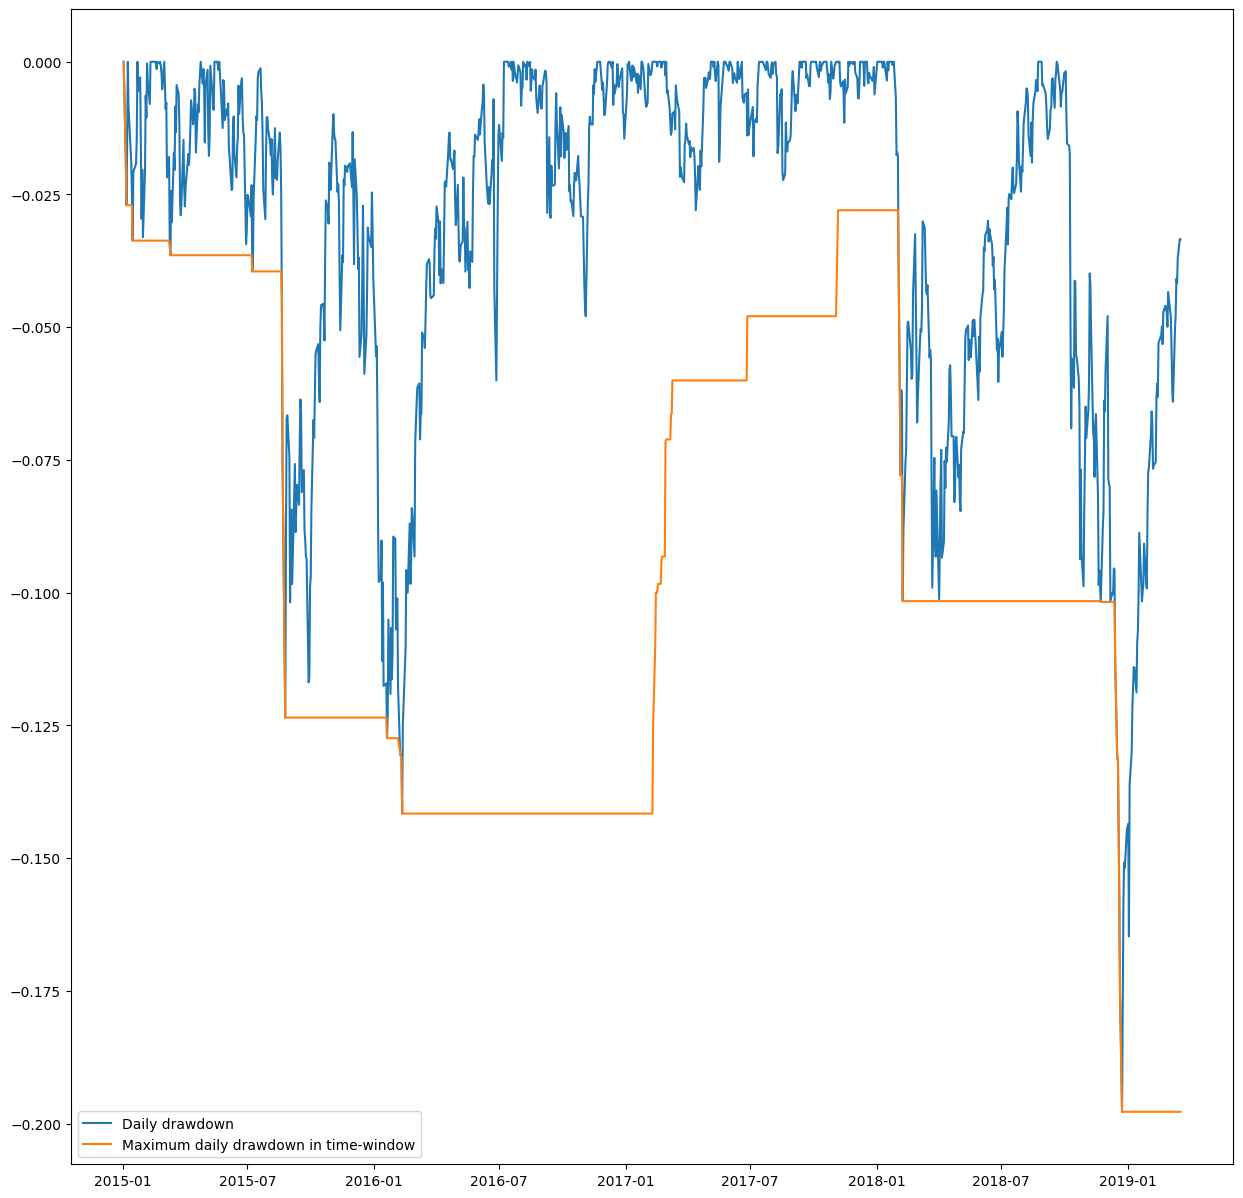

'\nCorrect! This is the lowest point in the orange line which indicates the maximum draw-down, it shows that at this point the portfolio dropped the most in performance in one day.\n'

In [101]:
# exercise 09

"""
Maximum draw-down portfolio

In this exercise, you'll learn how to calculate the maximum draw-down of the S&P500 (also known as "peak to trough performance drop"). Maximum draw-down is an incredibly insightful risk measure. It tells you what has been the worst performance of the S&P500 in the past years.

It is the reason why many investors shy away from crypto-currencies; nobody likes to lose a large percentage of their investment (e.g., 70%) in a short period.

In order to calculate the maximum draw-down of the S&P500, the daily S&P500 prices have been made available to you in a DataFrame called df.
"""

# Instructions

"""

    Taking a window of 252 trading days, find the rolling maximum value of the S&P500 prices in df and calculate daily draw-downs by dividing the prices in df by roll_max.
---

    Taking a window of 252 trading days, find the rolling maximum value of the S&P500 prices in df and calculate daily draw-downs by dividing the prices in df by roll_max.
---
Question

Which point on the graph indicates the lowest maximum daily draw-down?

Possible answers:
    
    2015-09
    
    2016-02
    
    2018-02
    
    2018-12
"""

# solution

# Calculate the max value 
roll_max = df.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = df/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(date, daily_draw_down, label='Daily drawdown')
plt.plot(date, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

#----------------------------------#

# Conclusion

"""
Correct! This is the lowest point in the orange line which indicates the maximum draw-down, it shows that at this point the portfolio dropped the most in performance in one day.
"""